In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=b51ea9b5076973e9590f7286214a2ca6f18790e04cc868cfccefb5283eb19c31
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from annoy import AnnoyIndex
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:


data = pd.read_csv('/content/drive/MyDrive/used_cars_data.csv')
data

<ipython-input-4-12747ee7d013>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/used_cars_data.csv')


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,2GNAXJEV0J6261526,39.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fairfield,26.0,NaN,...,A,Automatic,t72936,1.5T LT FWD,NaN,FWD,Front-Wheel Drive,107.3 in,72.6 in,2018
3000036,1GNERFKW0LJ225508,38.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,Vallejo,18.0,NaN,...,A,Automatic,t85763,LS FWD,NaN,FWD,Front-Wheel Drive,120.9 in,78.6 in,2020
3000037,3FA6P0HD3GR134062,38.3 in,NaN,NaN,NaN,Sedan,NaN,Napa,NaN,NaN,...,A,6-Speed Automatic Overdrive,t57569,SE,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016
3000038,SAJAJ4BNXHA968809,35 in,NaN,NaN,NaN,Sedan,NaN,Fairfield,30.0,NaN,...,A,Automatic,t65977,20d Premium AWD,NaN,AWD,All-Wheel Drive,111.6 in,81.7 in,2017


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

In [ ]:
data.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2.508755e+06,0.0,3.000040e+06,2.827654e+06,2.508755e+06,2.827654e+06,0.0,3.000040e+06,3.000040e+06,3.000040e+06,2.855653e+06,1.483027e+06,3.000040e+06,3.000040e+06,2.959168e+06,2.999944e+06,0.0,3.000040e+06
mean,2.269325e+01,NaN,7.605973e+01,2.968488e+03,2.947337e+01,2.479957e+02,NaN,3.698414e+01,2.754987e+08,-9.064224e+01,3.114690e+04,1.532644e+00,2.993337e+04,5.509768e+02,4.270413e+00,2.335224e+05,NaN,2.017728e+03
std,8.807024e+00,NaN,1.088839e+02,1.348905e+03,7.769252e+00,9.046639e+01,NaN,4.996819e+00,8.894123e+06,1.390589e+01,7.458675e+04,9.202928e-01,1.956617e+04,1.079448e+03,5.133017e-01,1.323221e+05,NaN,4.178701e+00
min,7.000000e+00,NaN,0.000000e+00,7.000000e+02,1.000000e+01,5.500000e+01,NaN,1.834670e+01,1.994620e+07,-1.579280e+02,0.000000e+00,1.000000e+00,1.650000e+02,0.000000e+00,1.000000e+00,4.159300e+04,NaN,1.915000e+03
25%,1.800000e+01,NaN,1.400000e+01,2.000000e+03,2.500000e+01,1.750000e+02,NaN,3.350920e+01,2.745794e+08,-9.708820e+01,6.000000e+00,1.000000e+00,1.845100e+04,0.000000e+00,4.000000e+00,6.337500e+04,NaN,2.017000e+03
50%,2.100000e+01,NaN,3.500000e+01,2.500000e+03,2.900000e+01,2.440000e+02,NaN,3.784710e+01,2.785453e+08,-8.724950e+01,8.267000e+03,1.000000e+00,2.647700e+04,0.000000e+00,4.341463e+00,2.816270e+05,NaN,2.020000e+03
75%,2.600000e+01,NaN,8.200000e+01,3.600000e+03,3.300000e+01,3.000000e+02,NaN,4.100620e+01,2.804553e+08,-8.045490e+01,4.366200e+04,2.000000e+00,3.822000e+04,7.850000e+02,4.605263e+00,3.366140e+05,NaN,2.020000e+03
max,1.270000e+02,NaN,3.599000e+03,8.400000e+03,1.270000e+02,1.001000e+03,NaN,6.120310e+01,2.820222e+08,-6.607850e+01,9.999999e+07,1.900000e+01,3.299995e+06,1.474140e+05,5.000000e+00,4.409510e+05,NaN,2.021000e+03


In [5]:
# Checking the number of missing values
missing_data = data.isnull()
missing_data_count = missing_data.sum()
missing_data_count

vin                           0
back_legroom             159269
bed                     2980472
bed_height              2570942
bed_length              2570942
                         ...   
wheel_system             146732
wheel_system_display     146732
wheelbase                159269
width                    159269
year                          0
Length: 66, dtype: int64

In [6]:
# Identifying columns with a large number of missing values
missing_columns = missing_data_count[missing_data_count > 100000].index

# Dropping columns with a large number of missing values
data.drop(columns=missing_columns, inplace=True)
data.columns

Index(['vin', 'body_type', 'city', 'daysonmarket', 'dealer_zip', 'description',
       'exterior_color', 'franchise_dealer', 'fuel_type', 'is_new', 'latitude',
       'listed_date', 'listing_color', 'listing_id', 'longitude', 'make_name',
       'model_name', 'price', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'transmission', 'transmission_display', 'year'],
      dtype='object')

In [ ]:
clean_data = data.isnull().sum()
clean_data

vin                         0
body_type               13543
city                        0
daysonmarket                0
dealer_zip                  0
description             77901
exterior_color          49955
franchise_dealer            0
fuel_type               82724
is_new                      0
latitude                    0
listed_date                 0
listing_color               0
listing_id                  0
longitude                   0
make_name                   0
model_name                  0
price                       0
savings_amount              0
seller_rating           40872
sp_id                      96
sp_name                     0
transmission            64185
transmission_display    64185
year                        0
dtype: int64

In [7]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns


numerical_missing = data[numerical_columns].isnull().sum()
categorical_missing = data[categorical_columns].isnull().sum()

print("Numerical columns with missing values:")
print(numerical_missing)

print("\nCategorical columns with missing values:")
print(categorical_missing)

Numerical columns with missing values:
daysonmarket          0
latitude              0
listing_id            0
longitude             0
price                 0
savings_amount        0
seller_rating     40872
sp_id                96
year                  0
dtype: int64

Categorical columns with missing values:
vin                         0
body_type               13543
city                        0
dealer_zip                  0
description             77901
exterior_color          49955
fuel_type               82724
listed_date                 0
listing_color               0
make_name                   0
model_name                  0
sp_name                     0
transmission            64185
transmission_display    64185
dtype: int64


In [8]:
data.drop(columns = ["description", "vin"],inplace=True)

In [9]:
# Impute missing values with mean for numerical columns
numerical_columns_with_missing = ['seller_rating', 'sp_id']  # Update this list with numerical columns containing missing values

for column in numerical_columns_with_missing:
    mean_value = data[column].mean()
    data[column] = data[column].fillna(mean_value)
numerical_missing = data[numerical_columns].isnull().sum()
numerical_missing

daysonmarket      0
latitude          0
listing_id        0
longitude         0
price             0
savings_amount    0
seller_rating     0
sp_id             0
year              0
dtype: int64

In [10]:


# Check unique values in each categorical column
categorical_columns = ["body_type", "exterior_color", "fuel_type", "transmission", "transmission_display"]

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

# Replace None values with "Unknown"
for column in categorical_columns:
    data[column] = data[column].replace([None], "Unknown")

# Verify that missing values have been handled
categorical_missing = data[categorical_columns].isnull().sum()
print("\nMissing values after handling:")
print(categorical_missing)


Unique values in body_type: ['SUV / Crossover' 'Sedan' 'Coupe' 'Hatchback' 'Pickup Truck' 'Wagon'
 'Minivan' 'Van' 'Convertible' nan]
Unique values in exterior_color: ['Solar Yellow' 'Narvik Black' nan ... 'Low Vol Bright Red' 'Modern S'
 'Cosmic']
Unique values in fuel_type: ['Gasoline' 'Diesel' nan 'Biodiesel' 'Flex Fuel Vehicle' 'Electric'
 'Hybrid' 'Compressed Natural Gas' 'Propane']
Unique values in transmission: ['A' 'M' 'CVT' nan 'Dual Clutch']
Unique values in transmission_display: ['9-Speed Automatic Overdrive' '6-Speed Manual'
 '8-Speed Automatic Overdrive' '6-Speed Automatic Overdrive'
 '6-Speed Automatic' '8-Speed Automatic' '9-Speed Automatic'
 'Continuously Variable Transmission' '5-Speed Automatic'
 '7-Speed Automatic' 'Automatic' nan 'Manual' '6-Speed Dual Clutch'
 '1-Speed Automatic' '4-Speed Automatic' '5-Speed Manual'
 '4-Speed Automatic Overdrive' '5-Speed Automatic Overdrive'
 '3-Speed Automatic' '2-Speed Automatic' '7-Speed Dual Clutch'
 '6-Speed Manual Overdrive'

In [ ]:
data.isna().sum()

body_type               0
city                    0
daysonmarket            0
dealer_zip              0
exterior_color          0
franchise_dealer        0
fuel_type               0
is_new                  0
latitude                0
listed_date             0
listing_color           0
listing_id              0
longitude               0
make_name               0
model_name              0
price                   0
savings_amount          0
seller_rating           0
sp_id                   0
sp_name                 0
transmission            0
transmission_display    0
year                    0
dtype: int64

In [11]:
data.dropna(subset=["price"], inplace=True)

In [12]:
data.columns

Index(['body_type', 'city', 'daysonmarket', 'dealer_zip', 'exterior_color',
       'franchise_dealer', 'fuel_type', 'is_new', 'latitude', 'listed_date',
       'listing_color', 'listing_id', 'longitude', 'make_name', 'model_name',
       'price', 'savings_amount', 'seller_rating', 'sp_id', 'sp_name',
       'transmission', 'transmission_display', 'year'],
      dtype='object')

In [13]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data= data[data['price'].notnull()]
data["price"]

0          23141.0
1          46500.0
2          46995.0
3          67430.0
4          48880.0
            ...   
3000035    17998.0
3000036    36490.0
3000037    12990.0
3000038    26998.0
3000039    19900.0
Name: price, Length: 3000040, dtype: float64

In [14]:
data["price"].astype(int)

0          23141
1          46500
2          46995
3          67430
4          48880
           ...  
3000035    17998
3000036    36490
3000037    12990
3000038    26998
3000039    19900
Name: price, Length: 3000040, dtype: int64

In [15]:
data.dtypes.value_counts()

object     12
float64     5
int64       4
bool        2
Name: count, dtype: int64

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
binary_vars = [col for col in data.columns if data[col].nunique() == 2 ]

categorical_vars = [ col for col in data.columns if col not in binary_vars and data[col].dtype == "object"]

numerical_vars = [ col for col in data.columns if col not in binary_vars and data[col].dtype in ['int64', 'float64']]


In [ ]:
binary_vars

['franchise_dealer', 'is_new']

In [ ]:
categorical_vars

['body_type',
 'city',
 'dealer_zip',
 'exterior_color',
 'fuel_type',
 'listed_date',
 'listing_color',
 'make_name',
 'model_name',
 'sp_name',
 'transmission',
 'transmission_display']

In [ ]:
numerical_vars

['daysonmarket',
 'latitude',
 'listing_id',
 'longitude',
 'price',
 'savings_amount',
 'seller_rating',
 'sp_id',
 'year']

In [ ]:
data.shape

(3000000, 23)

In [ ]:
print(data.describe(include='object'))

              body_type     city  dealer_zip exterior_color fuel_type  \
count           3000000  3000000     3000000        3000000   3000000   
unique               10     4687        9215          28664         9   
top     SUV / Crossover  Houston       77477          Black  Gasoline   
freq            1416386    43777        7318         162461   2598401   

       listed_date listing_color make_name model_name  sp_name transmission  \
count      3000000       3000000   3000000    3000000  3000000      3000000   
unique        1749            15       100       1429    26148            5   
top     2020-09-03         WHITE      Ford      F-150  Carvana            A   
freq         77384        666557    476327     128584     6993      2418315   

       transmission_display  
count               3000000  
unique                   45  
top               Automatic  
freq                1255084  


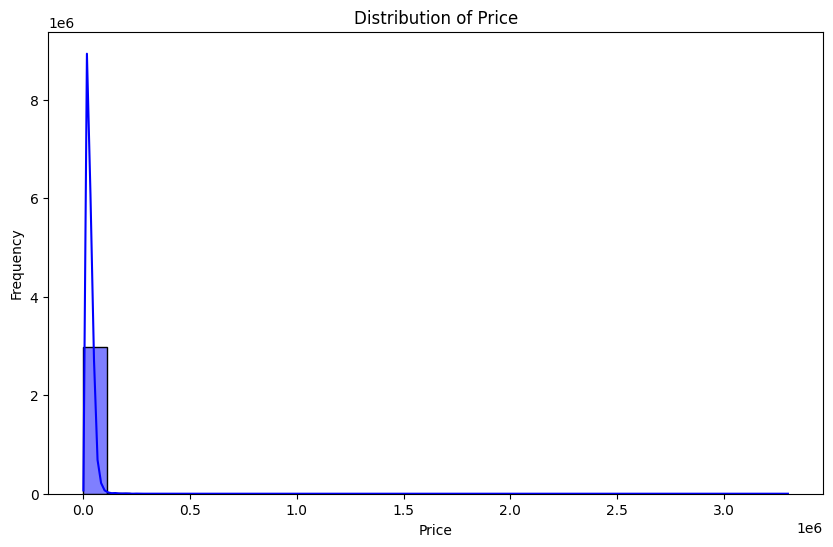

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

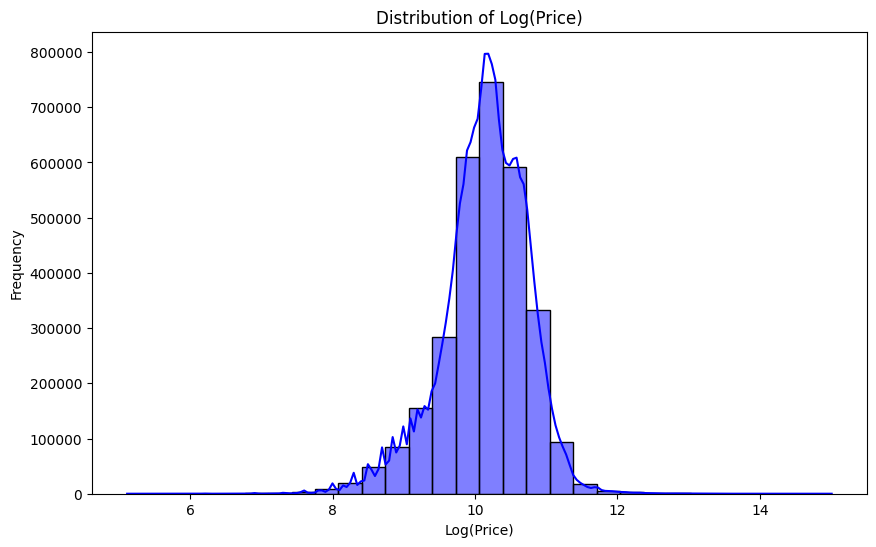

In [ ]:
data['log_price'] = np.log1p(data['price'])
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data[numerical_vars].dtypes

daysonmarket        int64
latitude          float64
listing_id          int64
longitude         float64
price             float64
savings_amount      int64
seller_rating     float64
sp_id             float64
year                int64
dtype: object

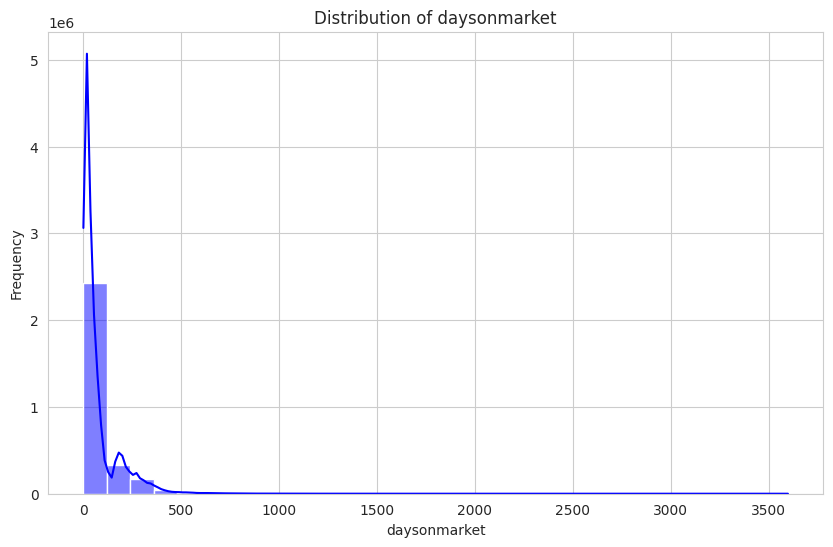

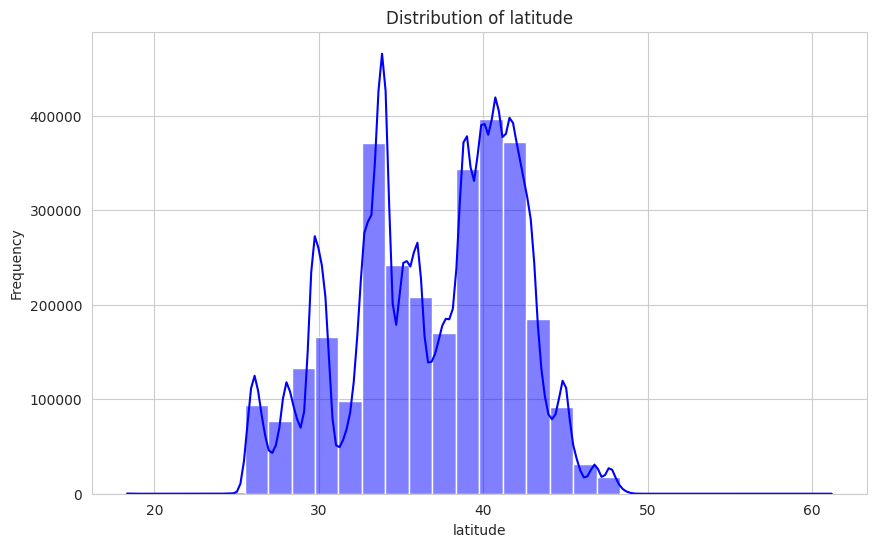

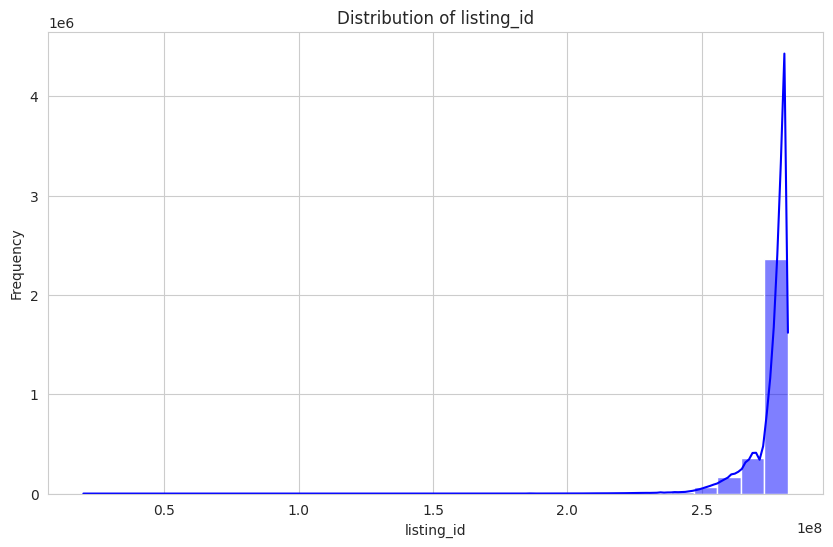

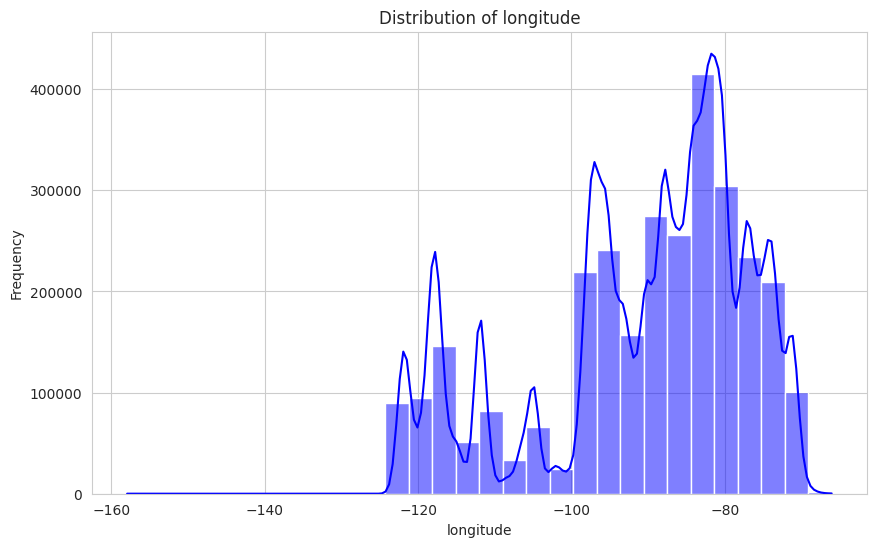

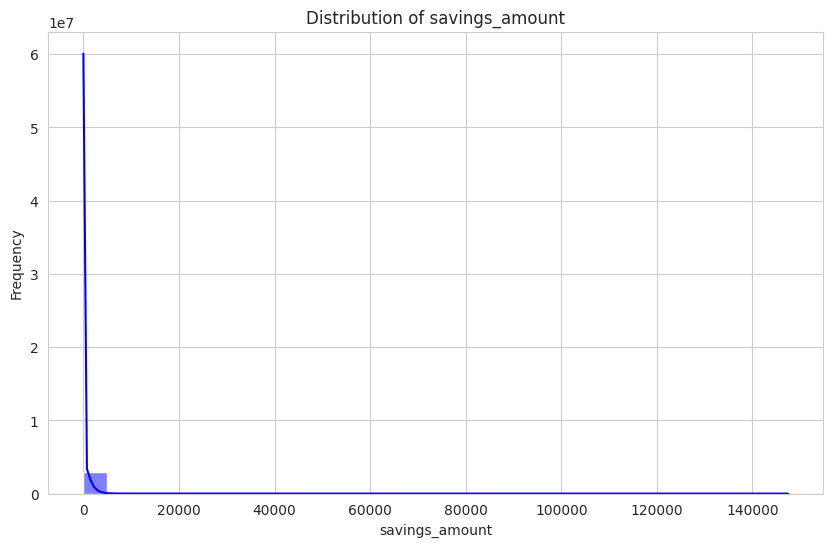

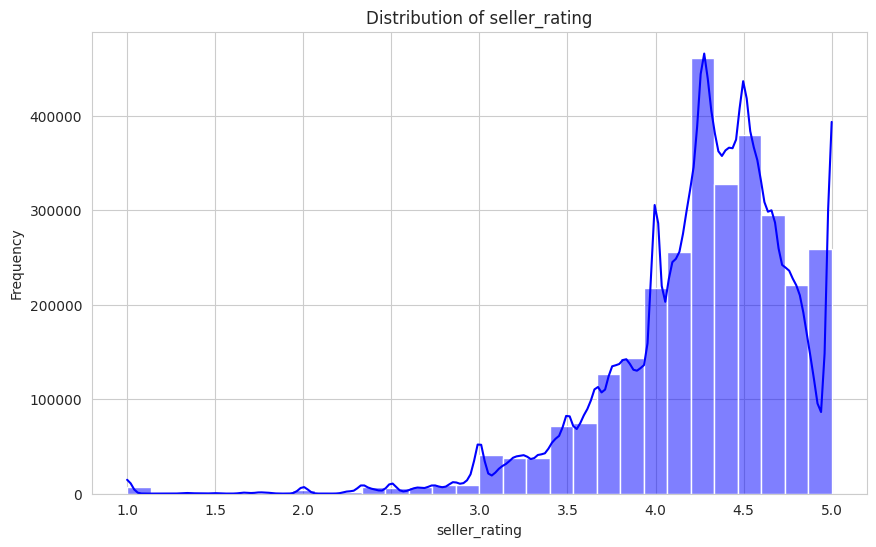

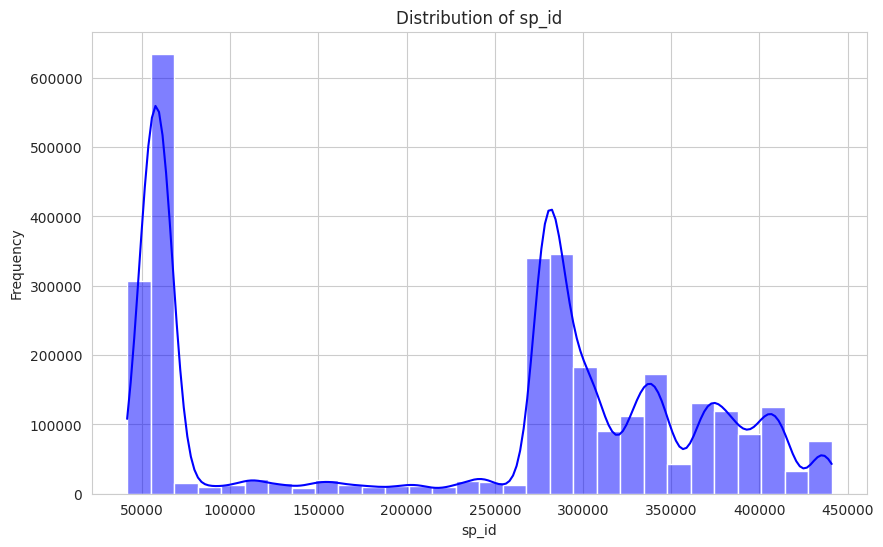

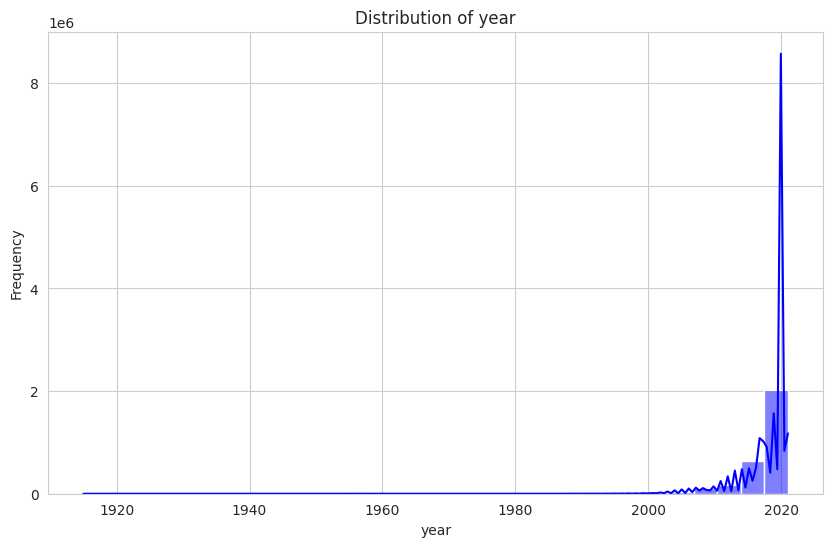

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_vars contains the names of numerical columns
numerical_vars = ['daysonmarket', 'latitude', 'listing_id', 'longitude', 'savings_amount', 'seller_rating', 'sp_id', 'year']

sns.set_style('whitegrid')

for column in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
skewness = data[numerical_vars].skew()
print("Skewness of Numerical Variables:")
print(skewness)

Skewness of Numerical Variables:
daysonmarket       3.910232
latitude          -0.333252
listing_id        -4.460214
longitude         -0.802577
savings_amount    11.937313
seller_rating     -1.504954
sp_id             -0.318468
year              -4.598271
dtype: float64


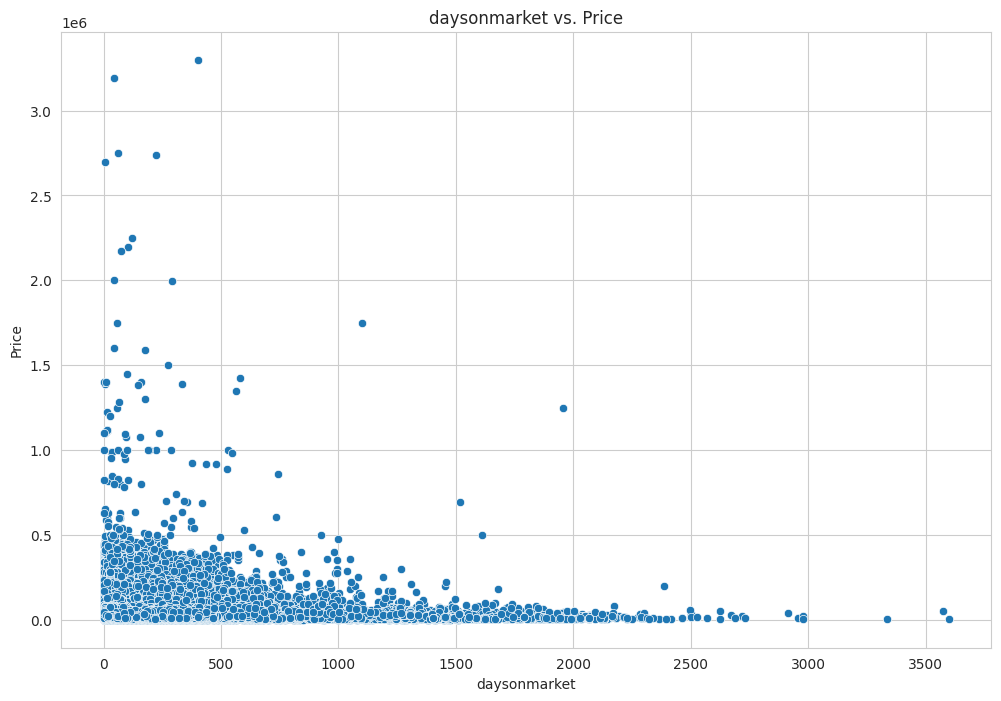

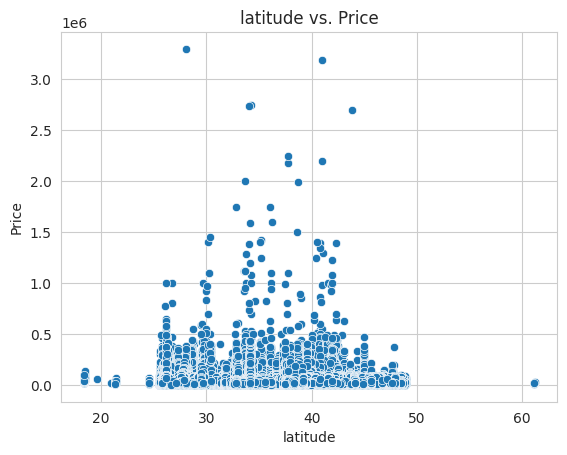

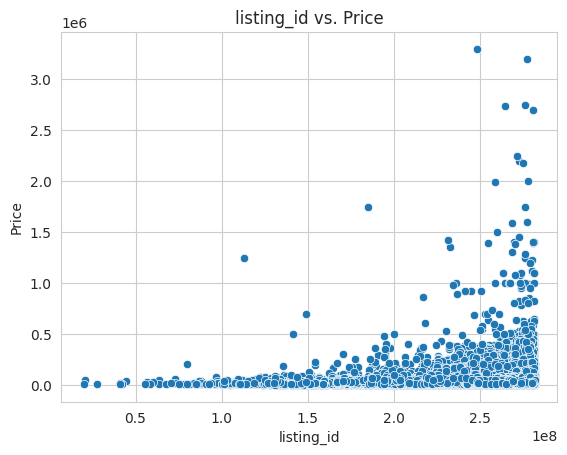

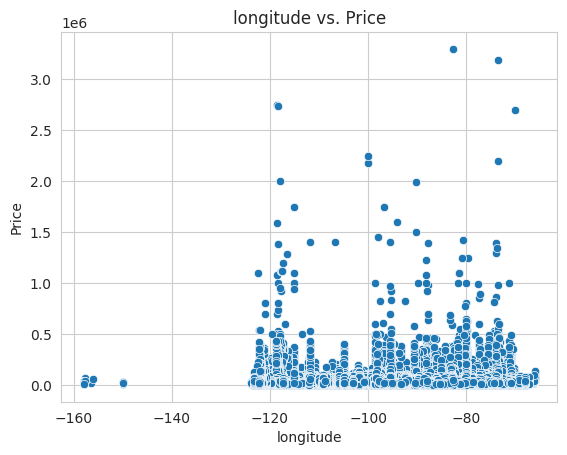

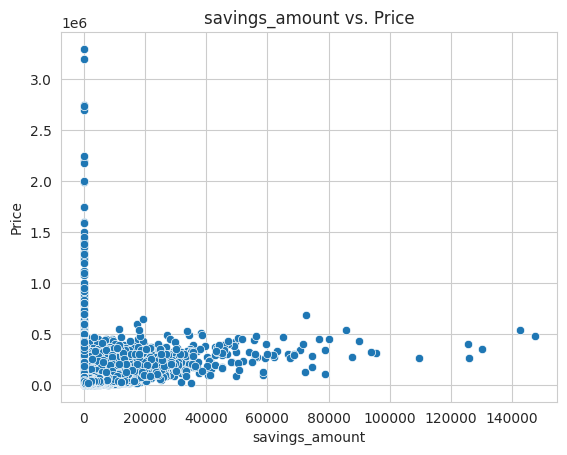

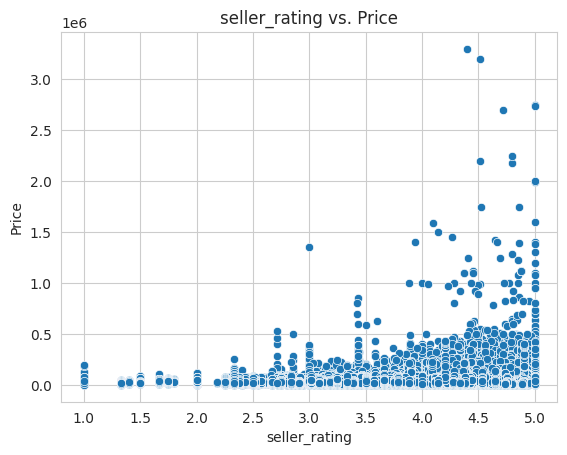

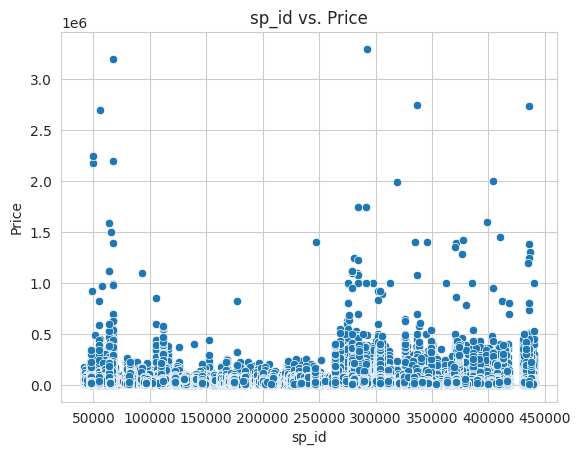

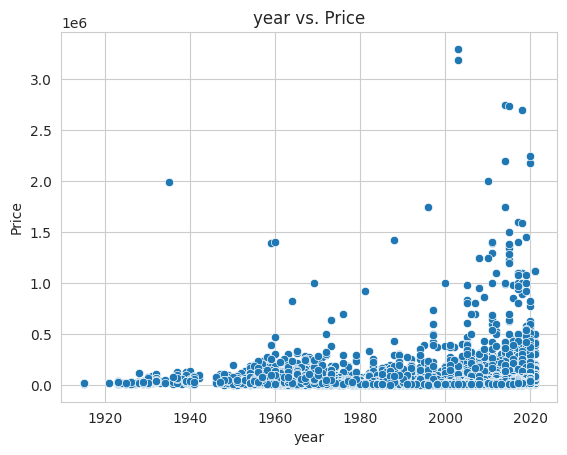

In [ ]:
plt.figure(figsize=(12, 8))
for column in numerical_vars:
    sns.scatterplot(data=data, x=column, y='price')
    plt.title(f'{column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

<ipython-input-31-f75db7ae4a62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations, y=correlations.index, palette='coolwarm')


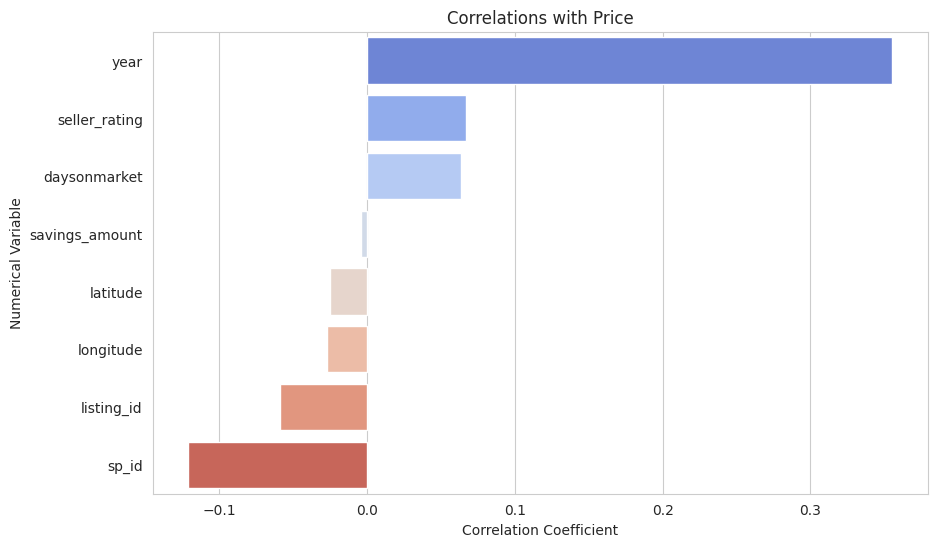

In [ ]:
correlations = data[numerical_vars].corrwith(data['price'])
correlations = correlations.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=correlations.index, palette='coolwarm')
plt.title('Correlations with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numerical Variable')
plt.show()

<Figure size 1200x800 with 0 Axes>

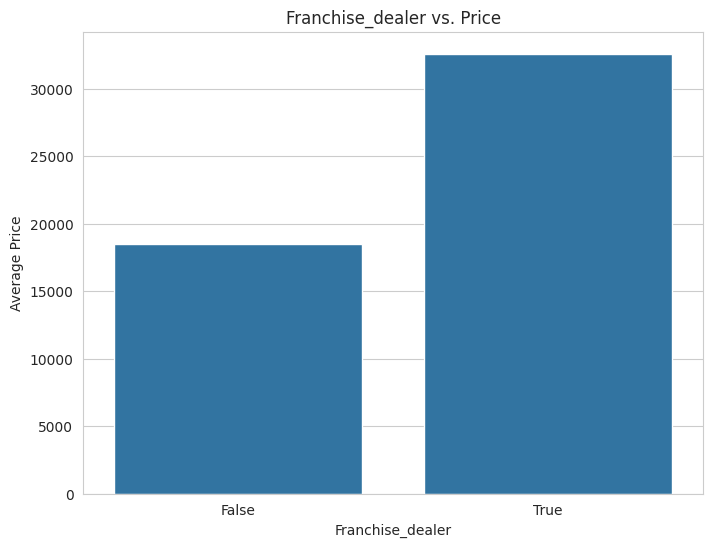

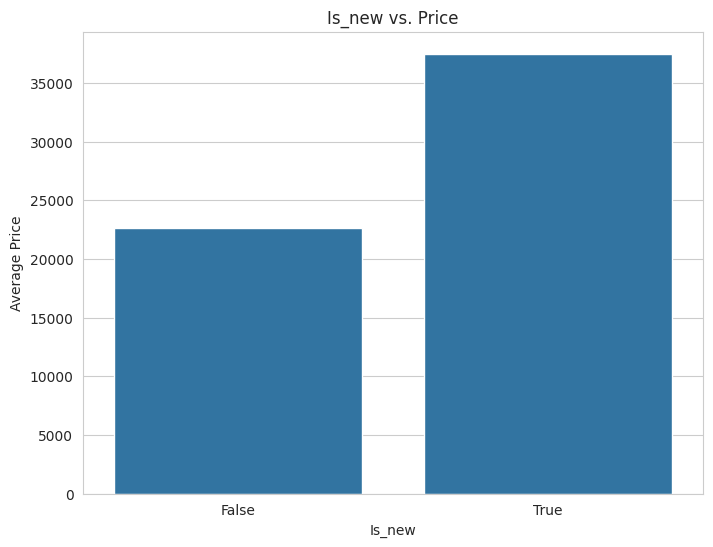

In [ ]:
plt.figure(figsize=(12, 8))
for column in binary_vars:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='price', data=data, estimator=np.mean, errorbar=None)
    plt.title(f'{column.capitalize()} vs. Price')
    plt.xlabel(column.capitalize())
    plt.ylabel('Average Price')
    plt.show()


In [ ]:
data[categorical_vars]

,body_type,city,dealer_zip,exterior_color,fuel_type,listed_date,listing_color,make_name,model_name,sp_name,transmission,transmission_display
0,SUV / Crossover,Bayamon,960,Solar Yellow,Gasoline,2019-04-06,YELLOW,Jeep,Renegade,Flagship Chrysler,A,9-Speed Automatic Overdrive
1,SUV / Crossover,San Juan,922,Narvik Black,Gasoline,2020-02-15,BLACK,Land Rover,Discovery Sport,Land Rover San Juan,A,9-Speed Automatic Overdrive
2,Sedan,Guaynabo,969,Unknown,Gasoline,2017-04-25,UNKNOWN,Subaru,WRX STI,FIAT de San Juan,M,6-Speed Manual
3,SUV / Crossover,San Juan,922,Eiger Gray,Gasoline,2020-02-26,GRAY,Land Rover,Discovery,Land Rover San Juan,A,8-Speed Automatic Overdrive
4,SUV / Crossover,San Juan,922,Narvik Black,Gasoline,2020-04-25,BLACK,Land Rover,Discovery Sport,Land Rover San Juan,A,9-Speed Automatic Overdrive
...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,SUV / Crossover,Fairfield,94533,Silver,Gasoline,2020-08-27,SILVER,Chevrolet,Equinox,CarMax Fairfield - Now offering Curbside Picku...,A,Automatic
3000036,SUV / Crossover,Vallejo,94591,Mosaic Black Metallic,Gasoline,2020-03-25,BLACK,Chevrolet,Traverse,Team Chevrolet,A,Automatic
3000037,Sedan,Napa,94559,Gray,Unknown,2020-06-13,GRAY,Ford,Fusion,Hanlees Chrysler Dodge Jeep Ram of Napa,A,6-Speed Automatic Overdrive
3000038,Sedan,Fairfield,94533,Green,Diesel,2020-09-01,GREEN,Jaguar,XE,CarMax Fairfield - Now offering Curbside Picku...,A,Automatic


In [18]:



# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
data[categorical_features] = data[categorical_features].astype(str)
# print('1')
# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# print('2')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# print('3')
# Apply preprocessing
X_processed = preprocessor.fit_transform(data)
# print('4')




In [19]:
# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=10)
X = svd.fit_transform(X_processed)

In [20]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# print('2')
input_dim = X_train.shape[1]

encoding_dim = 16  # Dimension of the latent space
# print('3')


input_layer = Input(shape=(input_dim,))


encoder1 = Dense(128, activation='relu')(input_layer)
encoder2 = Dense(64, activation='relu')(encoder1)
latent_layer = Dense(encoding_dim, activation='relu')(encoder2)

# Decoder
decoder1 = Dense(64, activation='relu')(latent_layer)
decoder2 = Dense(128, activation='relu')(decoder1)
output_layer = Dense(input_dim, activation='sigmoid')(decoder2)

# print('4')
autoencoder = Model(input_layer, output_layer)
# print('5')

# Compile and train the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# print('6')

# custom data generator
def data_generator(X_train, batch_size, noise_factor):
    while True:
        indices = np.random.permutation(X_train.shape[0])
        for i in range(0, X_train.shape[0], batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X_train[batch_indices]
            X_corrupted = X_batch.copy()
            X_corrupted[np.random.random(X_corrupted.shape) < noise_factor] = 0
            yield (X_corrupted, X_batch)

# Train the model using the data generator
generator = data_generator(X_train, batch_size=32, noise_factor=0.2)
# print('7')




In [ ]:
autoencoder.fit(generator, steps_per_epoch=X_train.shape[0] // 32, epochs=20)

# Reconstruct the data using the trained autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

# Step 4: Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(X_test, X_test_reconstructed)

# Step 5: Print the MSE
print("Mean Squared Error for 20 Epochs:", mse)

# Extract the encoder part of the model
encoder = Model(input_layer, output_layer)

Epoch 1/20
75000/75000 [==============================] - 178s 2ms/step - loss: 0.6850
Epoch 2/20
75000/75000 [==============================] - 180s 2ms/step - loss: 0.6742
Epoch 3/20
75000/75000 [==============================] - 178s 2ms/step - loss: 0.6709
Epoch 4/20
75000/75000 [==============================] - 181s 2ms/step - loss: 0.6694
Epoch 5/20
75000/75000 [==============================] - 181s 2ms/step - loss: 0.6685
Epoch 6/20
75000/75000 [==============================] - 179s 2ms/step - loss: 0.6680
Epoch 7/20
75000/75000 [==============================] - 180s 2ms/step - loss: 0.6678
Epoch 8/20
75000/75000 [==============================] - 176s 2ms/step - loss: 0.6673
Epoch 9/20
75000/75000 [==============================] - 181s 2ms/step - loss: 0.6673
Epoch 10/20
75000/75000 [==============================] - 181s 2ms/step - loss: 0.6670
Epoch 11/20
75000/75000 [==============================] - 205s 3ms/step - loss: 0.6668
Epoch 12/20
75000/75000 [================

In [21]:
autoencoder.fit(generator, steps_per_epoch=X_train.shape[0] // 32, epochs=50)

# Reconstruct the data using the trained autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

# Step 4: Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(X_test, X_test_reconstructed)

# Step 5: Print the MSE
print("Mean Squared Error for 40 Epochs:", mse)

# Extract the encoder part of the model
encoder = Model(input_layer, output_layer)

Epoch 1/50
75000/75000 [==============================] - 180s 2ms/step - loss: 0.6859
Epoch 2/50
75000/75000 [==============================] - 170s 2ms/step - loss: 0.6754
Epoch 3/50
75000/75000 [==============================] - 180s 2ms/step - loss: 0.6729
Epoch 4/50
75000/75000 [==============================] - 177s 2ms/step - loss: 0.6713
Epoch 5/50
75000/75000 [==============================] - 170s 2ms/step - loss: 0.6703
Epoch 6/50
75000/75000 [==============================] - 169s 2ms/step - loss: 0.6695
Epoch 7/50
75000/75000 [==============================] - 170s 2ms/step - loss: 0.6689
Epoch 8/50
75000/75000 [==============================] - 167s 2ms/step - loss: 0.6684
Epoch 9/50
75000/75000 [==============================] - 170s 2ms/step - loss: 0.6680
Epoch 10/50
75000/75000 [==============================] - 173s 2ms/step - loss: 0.6678
Epoch 11/50
75000/75000 [==============================] - 173s 2ms/step - loss: 0.6677
Epoch 12/50
75000/75000 [================

NameError: name 'encoded' is not defined

In [ ]:

# Obtain the latent representations of the cars
latent_representations = encoder.predict(X_train)
# print('9')
print(type(latent_representations))

num_trees = 10  # Number of random projections (adjust as needed)
ann_index = AnnoyIndex(latent_representations.shape[1], metric='euclidean')  # Euclidean distance
# print('10')
for i, vector in enumerate(latent_representations):
    ann_index.add_item(i, vector)

ann_index.build(num_trees)
# print('11')

k = 5
# Function to get top-k similar cars for a given car based on car id
def get_similar_cars(car_index, k=5):
    query_vector = latent_representations[car_index]
    print(type(query_vector))
    similar_indices = ann_index.get_nns_by_vector(query_vector, k) #np.argsort(similarities_ipca[car_index])[::-1][1:k+1]
    return data.iloc[similar_indices]
# print('14')
# Example usage
car_id = 40
top_similar_cars = get_similar_cars(car_id)
print(f"Top {k} similar cars to car {car_id}:")
print(top_similar_cars)



75000/75000 [==============================] - 92s 1ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Top 5 similar cars to car 40:
               body_type         city  daysonmarket dealer_zip  \
40                 Coupe        Bronx            36      10466   
2382969  SUV / Crossover  San Antonio            27      78216   
2121037     Pickup Truck   Cedar City             1      84721   
1088175     Pickup Truck       Buford            22      30518   
1439212  SUV / Crossover  Bay Minette            74      36507   

                 exterior_color  franchise_dealer fuel_type  is_new  latitude  \
40                        Black              True  Gasoline   False   40.8847   
2382969          Infinite Black              True  Gasoline    True   29.5258   
2121037            Oxford White              True  Gasoline   False   37.6837   
1088175  Bright White Clearcoat              True  Gasoline    True   34.0952   
1439212                   Green              True  Gasoline 

In [ ]:

from tabulate import tabulate


def preprocess_user_input(make_name, model_name, total_columns):
    user_input = [make_name, model_name]
    user_input += [0] * (total_columns - len(user_input))
    return user_input


# Function to find similar cars based on user input
def find_similar_cars(query_vector, num_neighbors=6):

    similar_indices = ann_index.get_nns_by_vector(query_vector, num_neighbors)
    print(similar_indices)

    similar_cars = [data.iloc[i] for i in similar_indices]
    return similar_cars


# Get user input
make_name = input("Enter car make: ")
model_name = input("Enter car model: ")

print(f"User Input \n Make Name - {make_name} \n Model Name - {model_name} ")
# Preprocess user input
user_input = preprocess_user_input(make_name, model_name, total_columns=24)
user_input_df = pd.DataFrame(user_input)
print(data.shape)
reshaped_user_input = pd.DataFrame(user_input_df.values.reshape(1, -1), columns = X_train.columns)

user_input_processed = preprocessor.transform(reshaped_user_input)

user_input_transformed = svd.transform(user_input_processed)

test_latent_representations = encoder.predict(user_input_transformed)
#print(test_latent_representations.shape)
query_vector = test_latent_representations.reshape(-1, 1)
#print(query_vector)


# Find similar cars based on user input
top_similar_cars = find_similar_cars(query_vector)

recommended_cars_info = pd.DataFrame(top_similar_cars, columns = data.columns)

# Display the DataFrame
print(tabulate(recommended_cars_info, headers='keys', tablefmt='psql', showindex=False))

Enter car make: BMW
Enter car model: 3 Series
User Input 
 Make Name - BMW 
 Model Name - 3 Series 
(3000000, 23)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
def catalog_coverage(recommended_items, catalog_size):
    unique_items = set(recommended_items)
    coverage = len(unique_items) / catalog_size
    return coverage

catalog_coverage(recommended_cars_info, data.shape[0])

8e-06